In [2]:
#this is what the variables will represent
#CUSTID : Identification of Credit Card holder (Categorical)
#BALANCE : Balance amount left in their account to make purchases (
#BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
#PURCHASES : Amount of purchases made from account
#ONEOFFPURCHASES : Maximum purchase amount done in one-go
#INSTALLMENTSPURCHASES : Amount of purchase done in installment
#CASHADVANCE : Cash in advance given by the user
#PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
#ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
#PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
#CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
#CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
#PURCHASESTRX : Numbe of purchase transactions made
#CREDITLIMIT : Limit of Credit Card for user
#PAYMENTS : Amount of Payment done by user
#MINIMUM_PAYMENTS : Minimum amount of payments made by user
#PRCFULLPAYMENT : Percent of full payment paid by user
#TENURE : Tenure of credit card service for user

In [3]:
#imports the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [5]:
cc_df = pd.read_csv('cc.csv')
cc_df.drop('CUST_ID', axis = 1, inplace=True) 
cc_df['MINIMUM_PAYMENTS'].fillna(value=cc_df['MINIMUM_PAYMENTS'].mean(), inplace = True) 
cc_df['CREDIT_LIMIT'].fillna(value=cc_df['CREDIT_LIMIT'].mean(), inplace = True) 
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
#we can see that we have no null values
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
#this will normalize our data
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cc_df) 
  
normalized_df = normalize(scaled_df) 

# Converting the scaled data back into a pandas DataFrame 
normalized_df = pd.DataFrame(data=normalized_df) 

In [8]:
#reduces the dimensions of our data
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.489825,-0.679679
1,-0.518791,0.545010
2,0.330885,0.268978
3,-0.482374,-0.092111
4,-0.563289,-0.481915


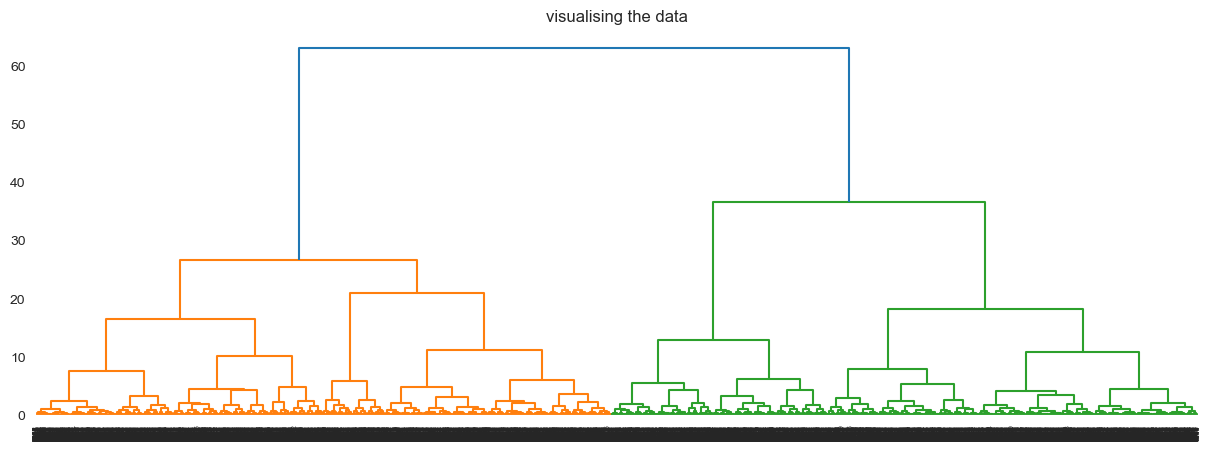

In [9]:
import scipy.cluster.hierarchy as shc

plt.title('visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

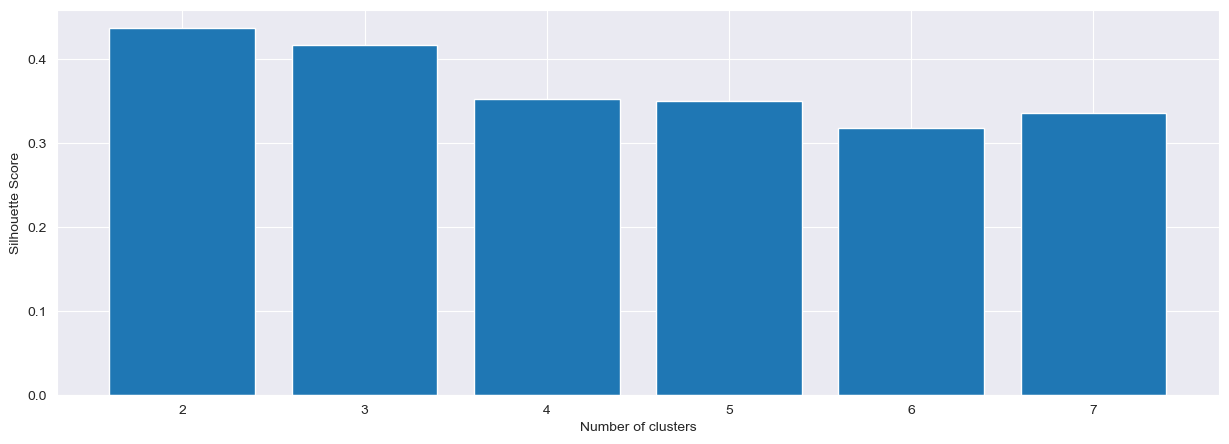

In [10]:
#finds the silhoutte score to determine optimal amount of clusters
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# where we'll save scores for later plotting
silhouette_scores = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [11]:
# creating and fitting model
#we choose 3 as the optimal number of clusters
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

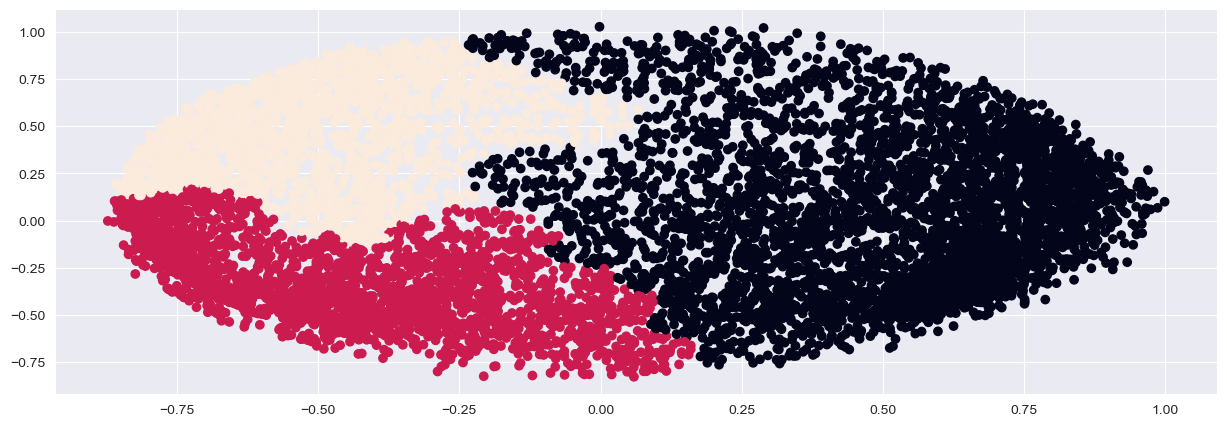

In [12]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal)) 
plt.show() 

In [13]:
customers_df = pd.read_csv('customers.csv')

In [21]:
customers_df.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
#we will drop genre since it is a string value
customers_df.drop("Genre", inplace = True, axis = 'columns')
customers_df.head()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [15]:
customers_df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(customers_df) 
  
normalized_df = normalize(scaled_df) 

# Converting the scaled data back into a pandas DataFrame 
normalized_df = pd.DataFrame(data=normalized_df) 

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.616450,-0.688409
1,-0.505240,-0.831002
2,-0.604943,-0.427461
3,-0.545842,-0.807508
4,-0.808550,-0.504300


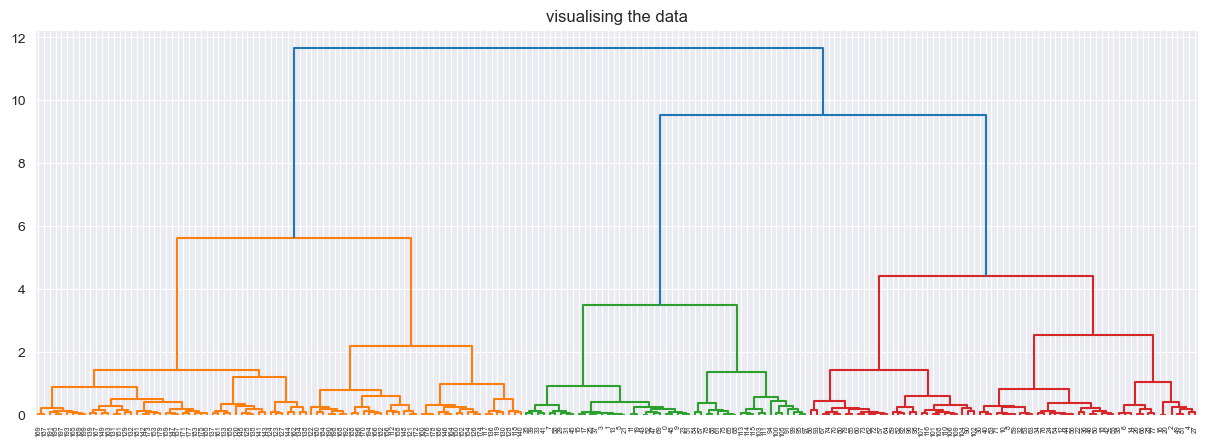

In [32]:
import scipy.cluster.hierarchy as shc

plt.title('visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

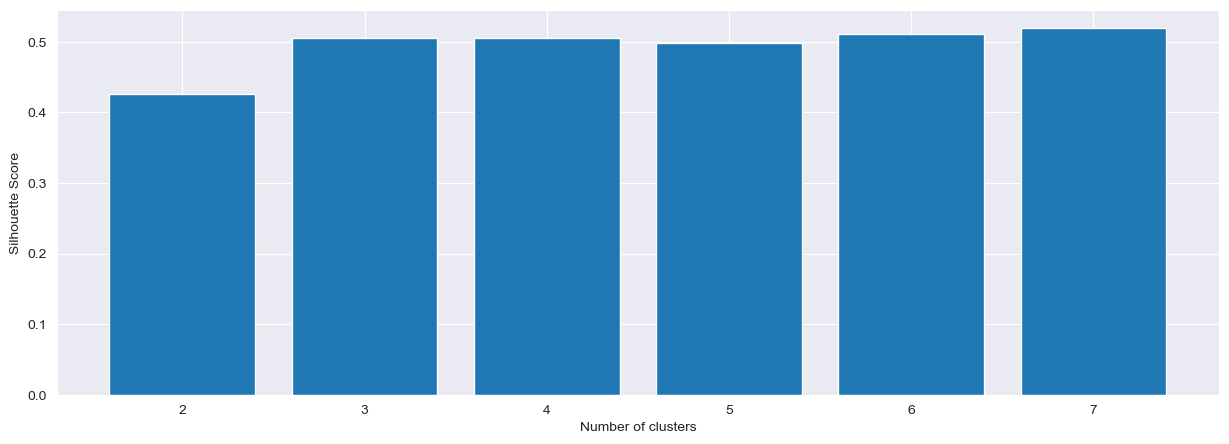

In [33]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# where we'll save scores for later plotting
silhouette_scores = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [34]:
# creating and fitting model
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)